# Encontro II

## Objetivo

Neste segundo encontro vamos discutir os seguintes assuntos: 

  - Estruturas numpy;
  - Álgebra linear usando numpy e modulos associados;
  - Distribuições de probabilidade;
  - Otimização;
  - Integração e derivação numéricas;
  - Exemplos.

A biblioteca `numpy` é o centro de toda computação científica em python. Ela implementa objetos `array` multidimensionais de alta performance e métodos para manipular tais objetos. 

## Estruturas numpy

Um `numpy array` é um gride de valores todos de mesmo tipo indexado por um `tuple` de inteiros não negativos. O número de dimensões é o `size` do `array` e o `shape` do `array` é uma `tuple` que mostra o tamanho de cada dimensão. Podemos inicializar arrays usando objetos do tipo `list` e acessar elementos do array usando colchetes (*square brackets*).


In [1]:
import numpy as np
a = np.array([1, 2, 3]) # Cria um array de rank = 1
print(type(a))
print(a.size) # Tamanho
print(a.shape) # Dimensão

a[0] = 10 # Modifica um elemento do array
print(a)

b = np.array([[1,2,3],[4,5,6]]) # array 2 linhas e 3 colunas
print(b)
print(b.size)
print(b.shape)

<class 'numpy.ndarray'>
3
(3,)
[10  2  3]
[[1 2 3]
 [4 5 6]]
6
(2, 3)


`Numpy` também fornece várias opções para inicializar arrays.

In [16]:
a = np.zeros((3,3))   # array de zeros 2x2
print(a)

b = np.ones((2,3))    # array de 1's 2x3
print(b)

c = np.full((4,4), 10)  # array 4x4 com todas as entradas iguais a 10
print(c)

d = np.eye(3)         # Matrix identidade 3x3
print(d)

e = np.random.random((2,2))  # Matrix 3x3 de números aleatórios
print(e)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 0.23672878  0.58462308]
 [ 0.19209855  0.02922875]]


### Acessando elementos do array

Similar a objetos do tipo `list` um `array` pode ser fatiados (*sliced*). Como os arrays são multidimensionais podemos especificar uma fatia para cada dimensão do `array`.

In [71]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) # array 
print(a.shape) # 3x4
print(a[0,]) # Primeira linha
print(a[0:2,]) # Primeira e segunda linha
print(a[2,]) # Terceira linha

(3, 4)
[1 2 3 4]
[[1 2 3 4]
 [5 6 7 8]]
[ 9 10 11 12]


Acessando as colunas do `array`.

In [72]:
print(a[:,2:4]) # Terceira e quarta coluna
print(a[:,3]) # Apenas a quarta coluna rsrs
print(a[:,2:3]) # Isso é estranho!!

[[ 3  4]
 [ 7  8]
 [11 12]]
[ 4  8 12]
[[ 3]
 [ 7]
 [11]]


Acessando elementos específicos.

In [85]:
a[1,1] # Segunda linha segunda coluna
print(a[1,2:4]) # Segunda linha colunas 3 e 4.

# Tirando apenas uma fatia do array e criando um novo
b = a[:2, 1:3]
print(b) 
# Mais cuidado os objetos ainda são os mesmos
b[0,0] = 100
print(a) 

# Evitando esse comportamento usando função deepcopy do module copy
from copy import deepcopy
c = deepcopy(a[:2, 1:3])
c[0,0] = 50
print(c)
print(a)

[7 8]
[[100   3]
 [  6   7]]
[[  1 100   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]
[[50  3]
 [ 6  7]]
[[  1 100   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


Capturar pedaços de um `array` que não sejam fatias é um pouco mais complicado. 
Suponha que queremos capturar a primeira e terceira linhas.

In [94]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = np.array([a[0,],a[2,]]) # novo array
b[0,0] = 100
print(a) # note que agora realmente temos um novo array que não altera o array anterior
print(b)
print(b.shape) #2x4

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[100   2   3   4]
 [  9  10  11  12]]
(2, 4)


Importante entender o que acontece com objetos `array`. Quando capturamos um `slice` do `array` a fatia capturada ainda é parte do `array` original e portanto qualquer modificação na fatia vai mudar também o `array`. Entretanto, quando capturamos fatias ou pedaços de um `array` e com essas fatias ou pedaços criamos um novo `array` que portanto não é mais parte do `array` original. Assim, mudanças no novo `array` não afetaram o `array` original.

Podemos selecionar elementos de um `array` usando variáveis boleanas. 

In [96]:
a[a > 2]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Existem muitas opções de como manipular e capturar fatias e/ou pedaços de `array` usando `numpy` para mais detalhes ver (http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

## Álgebra linear usando `numpy`

A classe `ndarray` disponibilizada pela biblioteca `numpy` é muito geral e flexível. Entretanto, em estatística em geral estamos interessados em matrizes. Uma matriz nada mais é do que um `array` bidimensional. Devido a sua importância não apenas em estatística mais em diversas áreas a biblioteca `numpy` oferece ferramentas específicas para trabalhar com matrizes em python. Para inicializar uma matriz em python o processo é muito similar a inicialização de um `array`. O interessante é que agora operações matemáticas simples podem ser feitas em todos os elementos da matriz que pode ser apenas um vetor linha ou coluna como mostra o código abaixo.

In [9]:
a = np.matrix([[1,2,3]]) # vetor linha
a.shape
b = a.T # transposto (vetor coluna)

print(a * 2) # Multiplicação por constante
print(b * 2)

print(np.sqrt(a)) # Raiz de cada elemento de a
print(np.exp(a)) # Exponencial de cada elemento de a
print(np.log(a)) # Logaritmo de cada elemento de a

print(a + a) # Soma dois vetores (elementwise)
print(b - b) # Subtrai dois vetores
print(a/a) # Divisão elementwise
print(np.multiply(a,a)) # multiplicação elementwise

[[2 4 6]]
[[2]
 [4]
 [6]]
[[ 1.          1.41421356  1.73205081]]
[[  2.71828183   7.3890561   20.08553692]]
[[ 0.          0.69314718  1.09861229]]
[[2 4 6]]
[[0]
 [0]
 [0]]
[[ 1.  1.  1.]]
[[1 4 9]]


Para inicializar uma matriz usando a `numpy` usamos uma sintaxe parecida com a inicialização de uma `list`.

In [3]:
A = np.matrix([ [1, 0.8, 0.6], [0.8, 1, 0.4], [0.6, 0.4, 1]])
B = np.matrix([ [1, 0.2, 0.3], [0.2, 1, 0.5], [0.3, 0.5, 1]])
print(A.shape)
print(B.shape)

(3, 3)
(3, 3)


Operações matriciais são executadas de forma intuitiva.

In [7]:
print(A + B) # Soma Elementwise
print(A - B) # Subtração
print(np.dot(A,B)) # Multiplicação matricial
print(np.diag(A)) # Pega só a diagonal
print(np.exp(A)) # Exponencial de cada entrada - util para geoestatística ;)

[[ 2.   1.   0.9]
 [ 1.   2.   0.9]
 [ 0.9  0.9  2. ]]
[[ 0.   0.6  0.3]
 [ 0.6  0.  -0.1]
 [ 0.3 -0.1  0. ]]
[[ 1.34  1.3   1.3 ]
 [ 1.12  1.36  1.14]
 [ 0.98  1.02  1.38]]
[ 1.  1.  1.]
[[ 2.71828183  2.22554093  1.8221188 ]
 [ 2.22554093  2.71828183  1.4918247 ]
 [ 1.8221188   1.4918247   2.71828183]]


As principais operações de álgebra linear estão implementadas em um modulo extra da `numpy` chamado de `numpy.linalg`. Sendo, vamos importar a biblioteca `numpy.linalg` usando apenas o prefixo `lp` e fazer algumas operações matriciais básicas como inversão, cálculo de determinantes e decomposições de autovalor e autovetor e Cholesky. Também podemos obter algumas propriedades da matrix como sua norma e rank.

In [9]:
import numpy.linalg as lp

print(lp.inv(A)) # inverse de A
print(lp.det(A)) # determinante de A

print(lp.eig(A)) # Autovalores e autovetores
print(lp.cholesky(A)) # Decomposição de Cholesky

print(lp.norm(A)) # Norma
print(lp.matrix_rank(A)) # Rank (numero de colunas li)

[[ 3.75       -2.5        -1.25      ]
 [-2.5         2.85714286  0.35714286]
 [-1.25        0.35714286  1.60714286]]
0.224
(array([ 2.21493472,  0.16242348,  0.6226418 ]), matrix([[ 0.63457746,  0.75716113, -0.15497893],
        [ 0.58437383, -0.60130182, -0.54492509],
        [ 0.50578521, -0.25523155,  0.82403773]]))
[[ 1.          0.          0.        ]
 [ 0.8         0.6         0.        ]
 [ 0.6        -0.13333333  0.78881064]]
2.30651251893
3


Outra ferramenta muito útil é a solução de sistemas lineares do tipo $Ax = b$. Em python isso é facilmente implementado, novamente usando o modulo `numpy.linalg`.

In [11]:
A = np.matrix([ [1, 0.8, 0.6], [0.8, 1, 0.4], [0.6, 0.4, 1]])
b = np.matrix([[1,2,3]]).T # Note o transposto precisamos de um vetor coluna
lp.solve(A,b)

matrix([[-5.        ],
        [ 4.28571429],
        [ 4.28571429]])

## Distribuições de probabilidade

As principais distribuições de probabilidade estão implementadas na biblioteca `scipy.stats`. Todas as distribuições implementadas nesta biblioteca tem um conjunto rico de métodos os principais são:

  - pdf: função densidade probabilidade ou função de probabilidade.
  - cdf: função de distribuição acumulada.
  - sf: função de sobreviência (complementar da cdf).
  - ppf: função quantil (inversa da cdf).
  - isf: inversa da função de sobreviência (complementar do inverso da cdf).
  - stats: esperança, variância, assimetria (skew) e curtose.
  - moment: Momentos não centrais.
  - rvs: amostras aleatórias.

Interessante notar que funções como a pdf e cdf são definidas na reta real, mesmo que a distribuição não corresponda a este suporte. Neste caso as funções vão retornar zero no caso da pdf e 0 ou 1 no caso da cdf. Por exemplo, o suporta da distribuição beta é o intervalo aberto (0,1). Assim, se a pdf fora deste intervalo será 0 e a cdf abaixo de 0 será 0 e acima de 1 será 1. 

Outro aspecto interessante da forma como a biblioteca `scipy.stats` implementa as distribuições é que você pode usá-las de duas formas: a primeira é a chamada forma congelada onde você inicializa a distribuição com os parâmetros de interesse e depois usa. A segunda você aplica a função diretamente passando como argumentos o ponto e os parâmetros para a avaliação da função. Vamos ver um exemplo,

In [20]:
import scipy.stats as sp

print(sp.norm.pdf(5, 3, 4)) # Avalia a distribuição Normal com mu = 3 e sigma2 = 4 no ponto 5.

mydist = sp.norm(3, 4) # Modo frozen 
print(mydist.pdf(5))

0.0880163316911
0.0880163316911


A biblioteca `scipy.stats` é muito rica em distribuições e a documentação é muito detalhada recomendo que veja o site da biblioteca [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Um outro aspecto útil é que todas as distribuições contínuas estão implementadas como um modelo de locação e escala. Esta é uma abordagem um pouco não usual, mas uma grande vantagem é que sabemos a parametrização de todas as distribuições contínuas previamente. A lista de distribuições é muito extensa e inclui distribuições multivariadas como a Gaussiana, Dirichlet e Wishart. 

Como um exemplo para explorar como usamos as distribuições da `scipy.stats` vou usar em um primeiro momento a distribuição Gaussiana porque suas propriedades são bem conhecidas. Em um segundo momento fazer usar uma distribuição não usual como a *generalized extreme value distribution*. Vamos calcular algumas quantidades da distribuição Gaussiana.

In [59]:
my_norm = sp.norm(loc = 10, scale = 5)
# Aspectos da distribuição
my_norm.expect() # Esperança
my_norm.median() # Mediana
my_norm.moment(n = 1) # Primeiro momento (esperança)
my_norm.moment(n = 2) # Segundo momento
my_norm.stats() # Média e variancia
my_norm.std() # Erro padrão
my_norm.var() # Variance
my_norm.entropy() # Entropia

mean, var, skew, kurt = my_norm.stats(moments = 'mvsk')
print(mean, var, skew, kurt)

10.0 25.0 0.0 0.0


Ainda não falamos sobre gráficos em python, mas eu vou inicializar uma figura, mais detalhes serão vistos nos próximos encontros. 
Gráfico da função densidade probabilidade.

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(my_norm.ppf(0.01), my_norm.ppf(0.99), 100)
ax.plot(x, my_norm.pdf(x), 'r-', lw=1, alpha=0.6, label='norm pdf')

Vamos simular uma amostra aleatório da distribuição Gaussiana e fazer um histograma e sobrepor a densidade que acabamos de calcular.

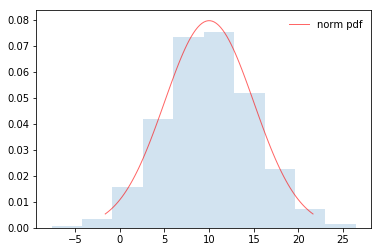

In [78]:
amostra = my_norm.rvs(10000)
ax.hist(amostra, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Outro método que também está disponível para todas as distribuições implementadas na biblioteca `scipy.stats` é o método `fit`. Como o nome sugere este método ajusta a distribuição para um vetor de observações. 

In [82]:
amostra = my_norm.rvs(100)
print(sp.norm.fit(amostra)) # Ajustando a própria Normal
print(sp.t.fit(amostra)) # Ajustando a distribuição t
print(sp.cauchy.fit(amostra)) # Cauchy ou qq outra que seja adequada.

(10.482028224058263, 4.5548538593399748)
(71.201643797121392, 10.459960255274375, 4.4904597272531337)


(9.8012505819540614, 2.6176037515189652)

Em geral as distribuições de probabilidade implementadas na biblioteca `scipy.stats` são vetorizadas. Assim, se o argumento for um objeto `ndarray` a função será aplicada em cada uma das entradas do `ndarray` e a saída também será um `ndarray`.

In [99]:
a = np.array([-3,-2,-1,0,1,2,3])
sp.norm.pdf(a, loc = 0, scale = 1)

array([ 0.00443185,  0.05399097,  0.24197072,  0.39894228,  0.24197072,
        0.05399097,  0.00443185])

Assim termino esta rápida introdução de como e onde as funções de probabilidades estão implementadas em python. Na sequência vou introduzir as principais idéias de otimização de funções em python.

## Otimização

Otimização de funções tem um papel central em inferência estatística. Uma vez que o estimador de maxima verossimilhança é o supremo da função de log-verossimilhança encontrar este ponto é crucial para o processo de inferência. O python através do modulo `scipy.optimization` fornece vários algoritmos para numericamente encontrar o mínimo/máximo de uma função pré-especificada. Este modulo também fornece algoritmos para solução de sistemas de equações não-lineares e minimização via métodos dos mínimos quadrados. Vamos ver alguns exemplos de como usar esta poderosa biblioteca. Como exemplo vou implementar a log-verossimilhança de um modelo de regressão linear simples.

In [219]:
x = np.array(range(0,10))
par = np.array([2,0.8,0.5])
my_norm = sp.norm(loc = 0, scale = par[2])
e = my_norm.rvs(len(x))
mu = par[0] + par[1]*x
y = mu + e
print(y)

[ 0.955178    3.0605878   3.06253339  3.7901356   5.16958236  5.88972862
  6.76677787  6.79734997  8.45627646  9.22860461]


In [233]:
from scipy.optimize import minimize
from math import exp, log

def linreg(par, y, x):
    mu = par[0] + par[1]*x
    output = -sp.norm.logpdf(y, loc = mu, scale = exp(par[2])).sum()
    #print(output)
    return(output)

# Avaliando a log-lik no ponto
linreg(par = np.array([2.1788,0.7743, log(0.3817)]), y = y, x = x) 

# Valores iniciais
par = np.array([2,0.8, log(2)])

# Nelder-Mead
res1 = minimize(linreg, par, method='nelder-mead', args = (y,x))
print(res.x)
print(res.fun)

# Gradiente Conjugado
res2 = minimize(linreg, par, method = 'CG', args = (y,x))
print(res2.x)
print(res2.fun)

# BFGS
res3 = minimize(linreg, par, method = 'BFGS',  args = (y,x))
print(res3.x)
print(res3.fun)

# Powell
res4 = minimize(linreg, par, method = 'Powell', args = (y,x))
print(res4.x)
print(res4.fun)

# Escore
print(res3.jac)

# Temos o inverso do hessiano
print(res3.hess_inv)



[ 1.48437886  0.85184602 -0.96076513]
4.58212128641
[ 1.4843624   0.85184735 -0.96072641]
4.582121267138361
[ 1.48436238  0.85184735 -0.96072644]
4.582121267138369
[ 1.48462153  0.85180644 -0.96136877]
4.5821260605
[ -2.98023224e-07   5.96046448e-07  -5.96046448e-07]
[[  5.12949827e-02  -7.98299503e-03   5.50750805e-04]
 [ -7.98299503e-03   1.78946275e-03  -9.84144963e-05]
 [  5.50750805e-04  -9.84144963e-05   5.10698521e-02]]
